# 1. Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

%matplotlib inline

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# 2. Reading the data

In [2]:
Data = pd.read_csv("credit_risk_dataset.csv")
Data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,3,Y
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,2,N
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,3,N
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,2,N
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,4,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,30,N
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,19,N
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,28,N
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,26,N


In [3]:
Data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_cred_hist_length  32581 non-null  int64  
 11  cb_person_default_on_file   32581 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# 2.1 Encoding Categorical Data

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#Scanning through all Columns
for column in Data.columns:
    
    #Finding Categorical Data columns
    if Data[column].dtype == 'object':
        Data[column] = encoder.fit_transform(Data[column])

Data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,3,1
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,2,0
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,3,0
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,2,0
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,30,0
32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,19,0
32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,28,0
32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,26,0


# 3. EDA 

<Axes: >

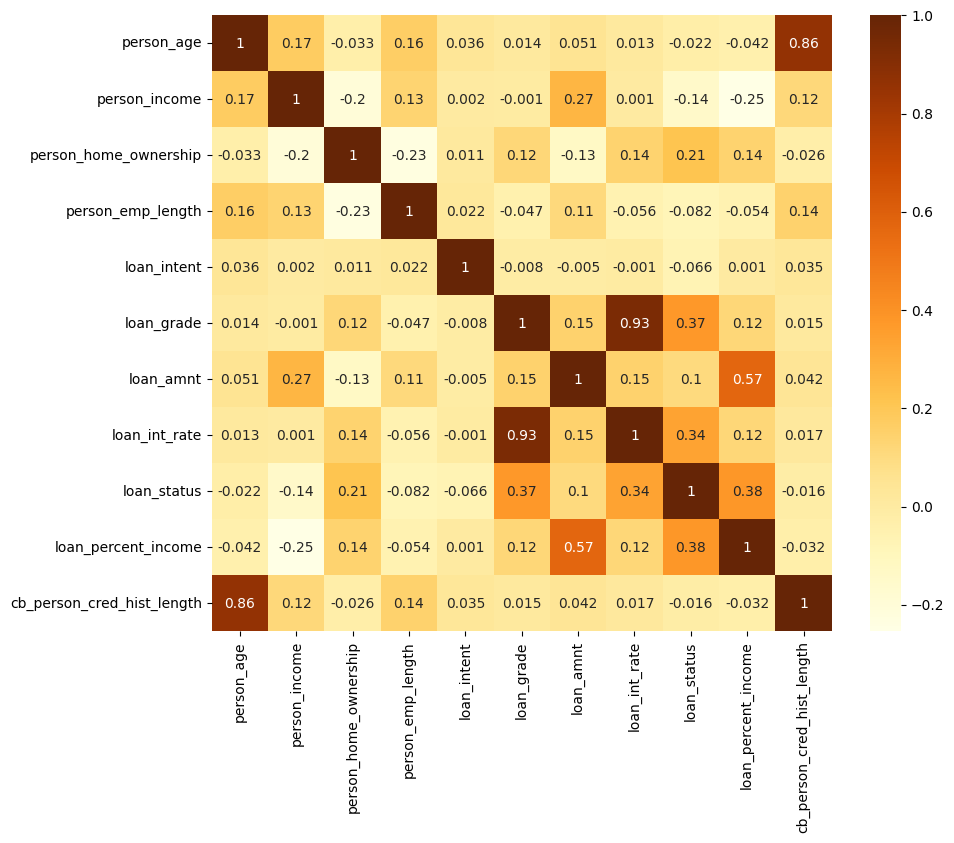

In [6]:
plt.figure(figsize=(10, 8))
correlation = Data.iloc[:,:-1].corr().round(3)
sns.heatmap(correlation,annot=True,cmap='YlOrBr')

In [7]:
# Define the independent variables (features) and the dependent variable (target)
X = Data[['person_age','cb_person_cred_hist_length']]

# Calculate VIF for each independent variable
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif_data = calculate_vif(X)

# Display the VIF results
print(vif_data)

                     Variable       VIF
0                  person_age  5.749017
1  cb_person_cred_hist_length  5.749017


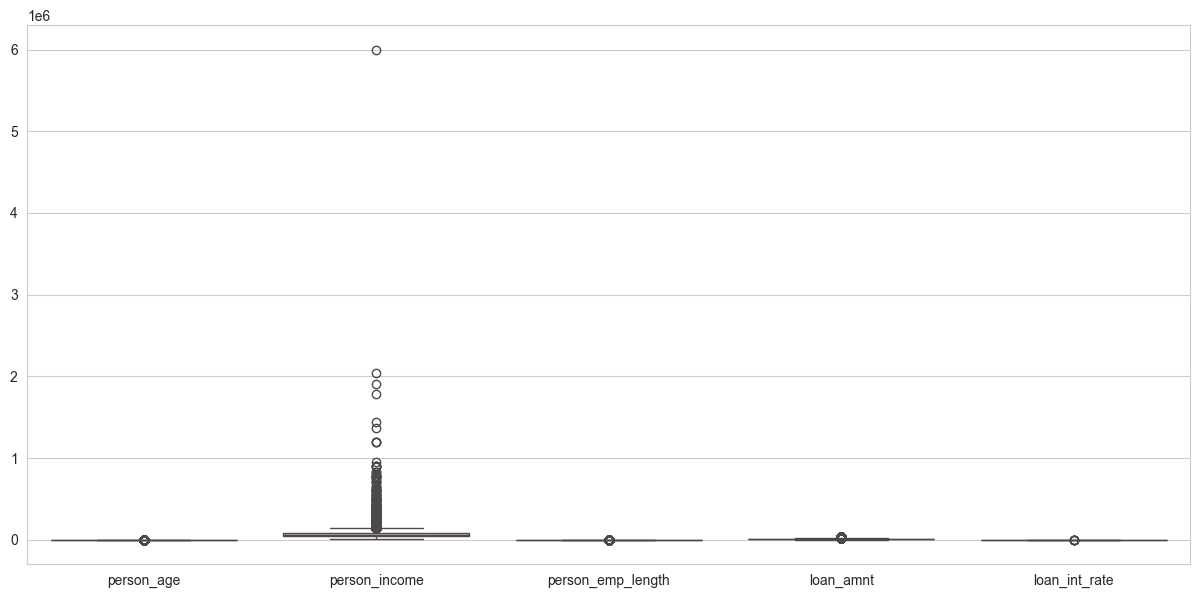

In [28]:
plt.figure(figsize=(15,7))
sns.boxplot(data = Data[['person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate']])
plt.show()

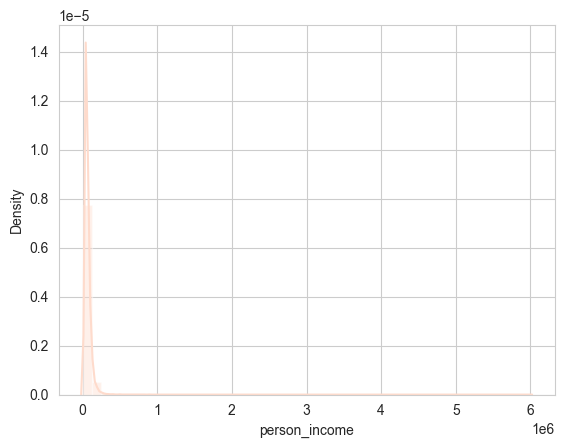

In [8]:
sns.set_palette("Reds")
sns.set_style('whitegrid')

# Residual check 

sns.distplot((Data['person_income']),bins=50);

In [9]:


def treat_outliers_iqr(Data, columns=None):

    if columns is None:
        # Select only numeric columns
        columns = Data.select_dtypes(include=[np.number]).columns.tolist()

    for col in columns:
        Q1 = Data[col].quantile(0.25)
        Q3 = Data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap values outside the bounds
        Data[col] = np.where(Data[col] > upper_bound, upper_bound,
                     np.where(Data[col] < lower_bound, lower_bound, Data[col]))

    return Data


In [10]:
#Calling the function to remove outliers
Data = treat_outliers_iqr(Data, columns=[
    'person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate'
])

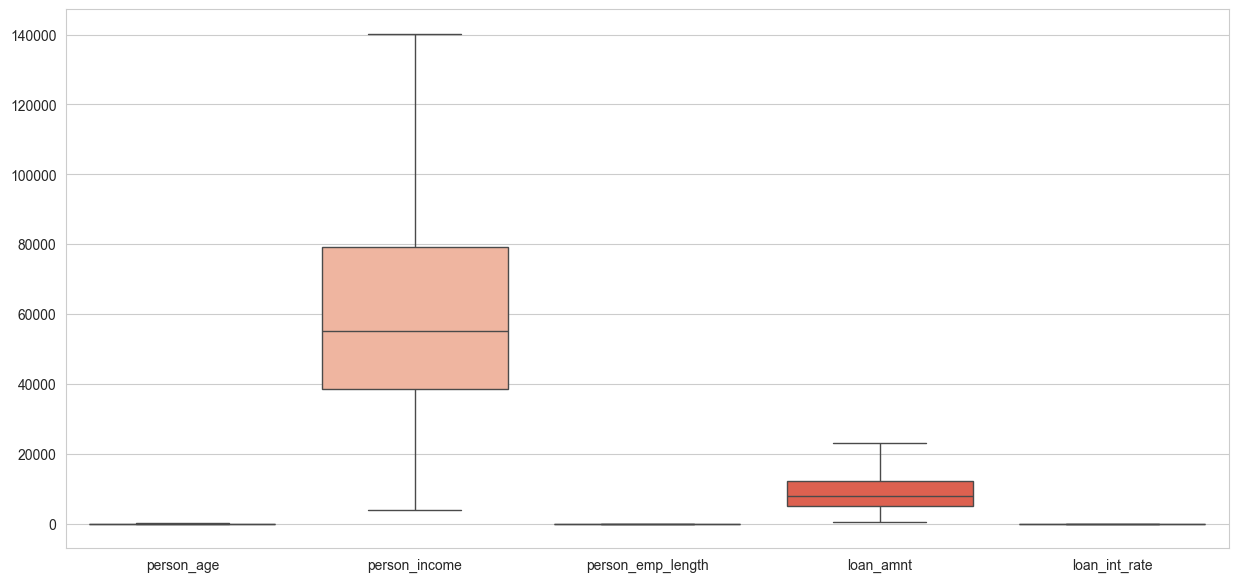

In [11]:
plt.figure(figsize=(15,7))
sns.boxplot(data = Data[['person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate']])
plt.show()

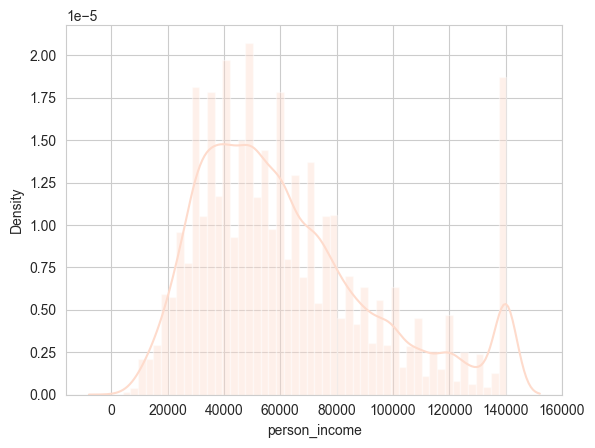

In [12]:
sns.set_palette("Reds")
sns.set_style('whitegrid')

# Residual check 

sns.distplot((Data['person_income']),bins=50);

In [39]:
(Data.isnull().sum()/len(Data))*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_cred_hist_length    0.000000
cb_person_default_on_file     0.000000
dtype: float64

In [13]:
# We have few null values as per the previous output, let's drop them
Data.dropna(inplace = True)
Data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_cred_hist_length    0
cb_person_default_on_file     0
dtype: int64

In [14]:
X=Data.iloc[:,:-1]
y=Data.iloc[:,-1]


<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

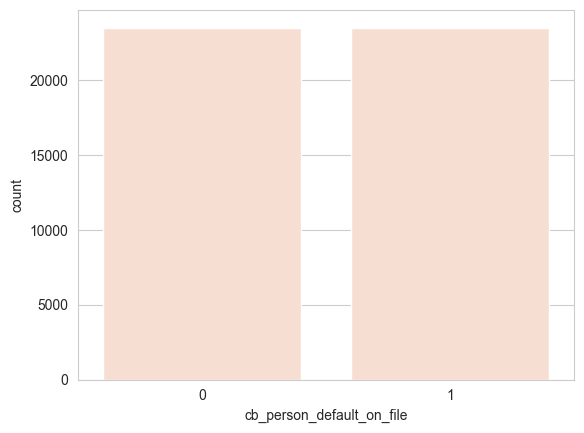

In [15]:
#Over sampler adds data points as per the data given to balance out the target count
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
sns.countplot(x=y)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 20)

clf.fit(X_train,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
Y_pred = clf.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9205438708306777

In [21]:
param_dist = {"criterion":["gini","entropy"],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,None]}

In [22]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(clf,param_grid=param_dist,cv=10,n_jobs=-1)

In [23]:
grid.fit(X_train,Y_train)

,estimator,DecisionTreeC...(max_depth=20)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [24]:
grid.best_score_

np.float64(0.9342998760842628)

In [25]:
grid.cv

10

In [26]:
grid.best_params_

{'criterion': 'gini', 'max_depth': None}

In [27]:
answers = np.zeros(60)
for i in range(1,60):
    
    clf = DecisionTreeClassifier(criterion='gini',max_depth = i)

    clf.fit(X_train,Y_train)

    Y_pred = clf.predict(X_test)

    answers[i] = accuracy_score(Y_test,Y_pred)
    
answers

array([0.        , 0.89111961, 0.89111961, 0.89101338, 0.89133206,
       0.89143828, 0.89175696, 0.89218186, 0.89292543, 0.89356278,
       0.89335033, 0.89398768, 0.8957935 , 0.89643085, 0.89929892,
       0.89898024, 0.90588485, 0.90917782, 0.91225834, 0.91533886,
       0.92033142, 0.9206501 , 0.92553644, 0.92681113, 0.92936053,
       0.9322286 , 0.93424687, 0.93615891, 0.93753983, 0.93817718,
       0.93838963, 0.93934566, 0.94008923, 0.93828341, 0.93849586,
       0.93881453, 0.93945188, 0.93987678, 0.93902698, 0.93785851,
       0.93934566, 0.9395581 , 0.93870831, 0.93870831, 0.93881453,
       0.93923943, 0.93892076, 0.93902698, 0.93977055, 0.93860208,
       0.93764606, 0.93902698, 0.93934566, 0.94019545, 0.93913321,
       0.93945188, 0.93764606, 0.93934566, 0.93828341, 0.93966433])

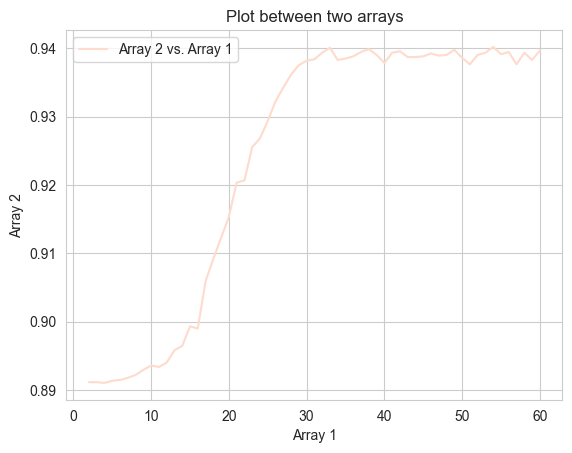

In [28]:
array1 = range(2,61)
array2 = answers[1:]
# Create a plot
plt.plot(array1, array2, label='Array 2 vs. Array 1')

# Add labels and title
plt.xlabel('Array 1')
plt.ylabel('Array 2')
plt.title('Plot between two arrays')

# Show a legend
plt.legend()

# Display the plot
plt.show()

In [29]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train,Y_train)

# Make predictions on the test data
Y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90      4740
           1       0.85      1.00      0.92      4674

    accuracy                           0.91      9414
   macro avg       0.92      0.91      0.91      9414
weighted avg       0.92      0.91      0.91      9414

